In [1]:
# Importing the 2 sets. one for the model, and the second for final testing. 

import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
last_campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv')

In [ ]:
# STEP 0
# First Data report

! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
 
from pandas_profiling import ProfileReport as pr
 
profile = pr(campaign)
profile.to_notebook_iframe()

In [2]:
# change target y to a numeric code using a dictionary and map
target_numeric = {'yes' : 1,
                  'no': 0}
campaign.y = campaign.y.map(target_numeric)
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [3]:
# variables names with points are not friendly change them with rename
campaign.rename(columns =  {'emp.var.rate' : 'emp_var_rate',
                   'cons.price.idx': 'cons_price_idx',
                   'cons.conf.idx' : 'cons_conf_idx',
                   'nr.employed': 'nr_employed'},
                   inplace = True)
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [4]:
#start the modeling here first approach with data as it is. 
# get dummies of the categorical values 
clean_data = pd.get_dummies(campaign, columns = ['job', 'marital','education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome'], drop_first = True)

clean_data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'

In [5]:
# OPTIONAL
# MANUAL SELECTION OF FEATURES
# Decide which features to use select data here it can also take the features from the head of feat_imports after run a model
features = ['nr_employed','euribor3m', 'cons_conf_idx','pdays', 'cons_price_idx','month_oct','contact_telephone','age','campaign']

X = clean_data [features]
y = clean_data['y']




In [6]:
# 

# Adressing the unbalance of the set
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html



ro = RandomOverSampler()

# Decide which features to use (all here)


X = clean_data.drop(['y'], axis = 1)
y = clean_data['y']

# Oversample, note that we oversample X and y at the same time in order to 
# make sure our features and targets stay synched.
X_new, y_new = ro.fit_resample(X, y)

# Convert this to a dataframe and check the counts, now they're equal, because
# we have a bunch of duplicate 
y = pd.DataFrame(y_new)
X = X_new
####################################################################

###################################################################

In [7]:

#Split data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size= 0.3)
# From here the model can be run 

In [8]:
# STEP 1
# Run the first clasifier
from sklearn.tree import DecisionTreeClassifier




## Create Decision Tree classifer object with gini criteria. Train Decision Tree with fit Classifer. Not tunned yet.

clf = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=2).fit(X_train, y_train)


In [9]:
#  EVALUATION OF THE MODEL 1

#Predict the response for test dataset with Decission tree
# .

from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))# See importance of each variable in the model Desission tree
# Features importances in a model this block can be run with diferent models to compare


feat_imports = (pd.DataFrame({"feature names": X_train.columns,
                              "importances": clf.feature_importances_})
                .sort_values("importances", ascending=False))

feat_imports.head()


              precision    recall  f1-score   support

           0       0.71      0.89      0.79     10991
           1       0.85      0.64      0.73     10938

    accuracy                           0.76     21929
   macro avg       0.78      0.76      0.76     21929
weighted avg       0.78      0.76      0.76     21929



,feature names,importances
8,nr_employed,0.561201
6,cons_conf_idx,0.120263
7,euribor3m,0.059245
0,age,0.043454
5,cons_price_idx,0.031544


In [10]:
#  START using Ensambles

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


clfr = RandomForestClassifier(n_estimators=12,
	max_depth=30, random_state=1).fit(X_train, y_train)

#Predict the response


y_pred = clfr.predict(X_test)

# Print clasification report
print(classification_report(y_test, y_pred)) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10991
           1       0.93      1.00      0.96     10938

    accuracy                           0.96     21929
   macro avg       0.96      0.96      0.96     21929
weighted avg       0.96      0.96      0.96     21929



In [ ]:
#  EVALUATION OF THE MODEL 

#Predict the response for test dataset with Random forest


# Features importances in a model this block can be run with diferent models to compare


feat_imports = (pd.DataFrame({"feature names": X_train.columns,
                              "importances": clfr.feature_importances_})
                .sort_values("importances", ascending=False))

feat_imports.head()


,feature names,importances
7,euribor3m,0.201139
0,age,0.156401
1,campaign,0.086955
8,nr_employed,0.065997
33,housing_yes,0.035317


In [11]:

# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

clfB = GradientBoostingClassifier(n_estimators=12 ,learning_rate=0.5,
                                 max_depth=20, random_state=1).fit(X_train, y_train)

#Predict the response for test  gradient boost


y_pred = clfB.predict(X_test)

# Print clasification report

print(classification_report(y_test, y_pred))
feat_imports = (pd.DataFrame({'feature names' : X_train.columns,
                              'importances': clfB.feature_importances_})
                  .sort_values('importances', ascending =False))
feat_imports.head()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10991
           1       0.93      1.00      0.96     10938

    accuracy                           0.96     21929
   macro avg       0.96      0.96      0.96     21929
weighted avg       0.96      0.96      0.96     21929



,feature names,importances
8,nr_employed,0.214147
0,age,0.160322
7,euribor3m,0.087024
1,campaign,0.076080
6,cons_conf_idx,0.049368


In [12]:
#  HistGradientBoostingClassifier

from sklearn.ensemble import HistGradientBoostingClassifier

clfH = HistGradientBoostingClassifier(random_state=1).fit(X_train, y_train)

# Print Classification report

print(classification_report (y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10991
           1       0.93      1.00      0.96     10938

    accuracy                           0.96     21929
   macro avg       0.96      0.96      0.96     21929
weighted avg       0.96      0.96      0.96     21929



In [ ]:
# Start runing the models agains the original data for testing.



In [13]:
# remember that clean data holds the original data without resampling 
# Select the data 

X = clean_data.drop(['y'], axis = 1)
y = clean_data['y']




In [14]:

#Split data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size= 0.3)
# From here the model can be run 

In [15]:

# GradientBoostingClassifier


#Predict the response for test  gradient boost


y_pred = clfB.predict(X_test)

# Print clasification report

print(classification_report(y_test, y_pred))
feat_imports = (pd.DataFrame({'feature names' : X_train.columns,
                              'importances': clfB.feature_importances_})
                  .sort_values('importances', ascending =False))
feat_imports.head()


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     10942
           1       0.82      1.00      0.90      1415

    accuracy                           0.98     12357
   macro avg       0.91      0.99      0.94     12357
weighted avg       0.98      0.98      0.98     12357



,feature names,importances
8,nr_employed,0.214147
0,age,0.160322
7,euribor3m,0.087024
1,campaign,0.076080
6,cons_conf_idx,0.049368


In [16]:
#  EVALUATION OF THE MODEL random forest

#Predict the response for test dataset with Random forest

y_pred = clfr.predict(X_test)

print(classification_report(y_test, y_pred))

feat_imports = (pd.DataFrame({"feature names": X_train.columns,
                              "importances": clfr.feature_importances_})
                .sort_values("importances", ascending=False))

feat_imports.head()


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     10942
           1       0.82      1.00      0.90      1415

    accuracy                           0.98     12357
   macro avg       0.91      0.98      0.94     12357
weighted avg       0.98      0.98      0.98     12357



,feature names,importances
7,euribor3m,0.174119
0,age,0.151635
1,campaign,0.082407
8,nr_employed,0.079710
33,housing_yes,0.034179


In [17]:
# Persistance of the model

import pickle
sampleModel = pickle.dumps(clfr, pickle.HIGHEST_PROTOCOL)
clf2 = pickle.loads(sampleModel)
clf2.predict(X_test)


array([1, 0, 0, ..., 1, 0, 0])

From here start the test of the last campaign 
remember that clf2 is random forest, clf3 is gradientBoost clasifier and clf4 is histGradientBoost clasifier.

In [ ]:
clf2 = clfr
clf3 = clfB
clf4 = clfH

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

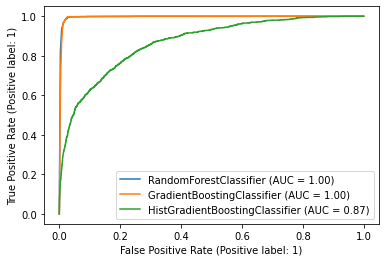

In [ ]:
# compare the models 
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf2, X_test, y_test)
plot_roc_curve(clf3, X_test, y_test, ax=disp.ax_);
plot_roc_curve(clf4, X_test, y_test, ax=disp.ax_);

In [ ]:
# Start by run all the cleaning with the new data to make predictions


In [18]:
# variables names with points are not friendly change them with rename
last_campaign.rename(columns =  {'emp.var.rate' : 'emp_var_rate',
                   'cons.price.idx': 'cons_price_idx',
                   'cons.conf.idx' : 'cons_conf_idx',
                   'nr.employed': 'nr_employed'},
                   inplace = True)
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [19]:
# variables names with points are not friendly change them with rename
last_campaign.rename(columns =  {'emp.var.rate' : 'emp_var_rate',
                   'cons.price.idx': 'cons_price_idx',
                   'cons.conf.idx' : 'cons_conf_idx',
                   'nr.employed': 'nr_employed'},
                   inplace = True)
last_campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [20]:
#start the modeling here first approach with data as it is. 
# get dummies of the categorical values 
clean_data = pd.get_dummies(last_campaign, columns = ['job', 'marital','education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome'], drop_first = True)

clean_data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
  

In [21]:
#start the modeling here first approach with data as it is. 
# get dummies of the categorical values 
clean_data2 = pd.get_dummies(last_campaign, columns = ['job', 'marital','education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome'], drop_first = True)
# This set has not y value target
X = clean_data2

In [22]:
# make the predictions from the last campaign
predictions = clf2.predict(X)

In [23]:
# convert to dataframe to see results
predictions = pd.DataFrame(predictions)
predictions.value_counts()

0    3555
1     564
dtype: int64

In [24]:
#rename the column

predictions.rename(columns={0 : 'predictions'}, inplace= True)

# create a csv file in colab without index

predictions.to_csv('predictions.csv', index = False)

# download the file to the user computer current directory
from google.colab import files

files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# First 5 feature importances in the forest tree model 
